

# FNN Zalando


In [1]:
import numpy
# scipy.special für die Sigmoid-Funktion expit()
import scipy.special
# Bibliothek zum Plotten von Arrays
import matplotlib.pyplot as plt
# sicherstellen, dass die Plots in diesem Notebook und nicht in einem externen Fenster angezeigt werden
%matplotlib inline

In [2]:
# Definition der neuronalen Netzwerkklasse
class neuralNetwork:
    
    # Initialisierung des neuronalen Netzwerks
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Anzahl der Nodes in jeder Input-, hidden und output layer festlegen
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Gewichtsmatrizen, wih und who
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # Lernrate
        self.lr = learningrate
        
        # Aktivierungsfunktion ist die Sigmoid-Funktion
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # Trainieren des neuronalen Netzwerks
    def train(self, inputs_list, targets_list):
        # Inputs in ein 2D-Array umwandeln
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Signale in dem Hidden Layer berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Signale berechnen, die aus dem Hidden Layer hervorgehen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Signale in dem endgültigen Output Layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Signale berechnen, die aus dem endgültigen Output Layer  hervorgehen
        final_outputs = self.activation_function(final_inputs)
        
        # Fehler in dem Output Layer ist (Ziel - Ist)
        output_errors = targets - final_outputs
        # Fehler in dem Hidden Layer ist der output_errors, aufgeteilt nach Gewichten, neu kombiniert an den Hidden Nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # Gewichte für die Verbindungen zwischen den hidden und den Output Layers aktualisieren
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # Gewichte für die Verbindungen zwischen den Input- und den Hidden Layern aktualisieren
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    # Abfragen des neuronalen Netzwerks
    def query(self, inputs_list):
        # Input List in ein 2D-Array umwandeln
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # Signale in die Hidden Layern berechnen
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Signale berechnen, die aus dem Hidden Layer hervorgehen
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Signale in den endgültigen Output Layer berechnen
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Signale berechnen, die aus dem endgültigen Output Layer hervorgehen
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# Anzahl an input, hidden und output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 1

# Lernrate
learning_rate = 0.05

# Erstelle Instanz des neuronalen Netzwerks
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
with open("../data/fashion-mnist_train.csv", 'r') as training_data_file:
    training_data_list = training_data_file.readlines()[1:]

In [5]:
with open("../data/fashion-mnist_test.csv", 'r') as test_data_file:
    test_data_list = test_data_file.readlines()[1:]

In [6]:
# Erstellen Sie eine Liste von 10 Modellen
models = []
for i in range(10):
    models.append(neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate))

In [7]:
# Epochen ist die Anzahl der Male, die der Trainingsdatensatz zum Training verwendet wird
epochs = 3

# Erstellen Sie eine Liste von 10 Ensembles, die jeweils 10 Modelle enthalten
ensembles = []
for _ in range(10):
    ensemble = []
    for i in range(10):
        ensemble.append(neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate))
    ensembles.append(ensemble)

In [8]:
# Trainiere jedes Modell in jedem Ensemble auf die jeweilige Klasse gegen den Rest
for ensemble in ensembles:
    for i in range(10):
        for e in range(epochs):
            for record in training_data_list:
                all_values = record.split(',')
                inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
                target = numpy.array([0.99 if int(all_values[0]) == i else 0.01])
                ensemble[i].train(inputs, target)

In [ ]:
# Nach dem Trainieren der Ensembles
import matplotlib.pyplot as plt

def calculate_confidence_scores(data_list, ensembles):
    confidence_scores = []
    for record in data_list:
        # Berechne Konfidenzwerte für jedes Ensemble
        ensemble_predictions = []
        for ensemble in ensembles:
            predictions = [model.query(inputs)[0] for model in ensemble]
            ensemble_predictions.append(max(predictions))

        confidence_scores.append(max(ensemble_predictions))

    return confidence_scores

# Berechne Konfidenzwerte für Trainings- und Testdaten
training_confidences = calculate_confidence_scores(training_data_list, ensembles)

# Visualisiere die Verteilung der Konfidenzwerte
plt.figure(figsize=(10, 6))
plt.hist(training_confidences, bins=30, alpha=0.5, label='Trainingsdaten')
plt.title('Verteilung der Sicherheitsmaßergebnisse')
plt.xlabel('Konfidenzwert')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x8ce628ca0>
Traceback (most recent call last):
  File "/Users/grewal/Library/Python/3.9/lib/python/site-packages/matplotlib/transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
KeyboardInterrupt: 


In [ ]:
# Iteriere über jedes Ensemble in der Liste der Ensembles
for ensemble in ensembles:
    # Äußere Schleife: 10 Iterationen (wahrscheinlich für 10 Klassen/Ziffern)
    for i in range(10):
        # Innere Schleife: Trainiere über eine definierte Anzahl von Epochen
        for e in range(epochs):
            # Durchlaufe jeden Datensatz in der Trainingsdatenliste
            for record in training_data_list:
                # Teile den Datensatz in Werte auf (erste Spalte = Label, Rest = Eingabedaten)
                all_values = record.split(',')

                # Normalisiere die Eingabedaten:
                # 1. Konvertiere Pixel-Werte in Float-Array
                # 2. Skaliere Werte von 0-255 auf 0.01-0.99
                # 3. Füge einen kleinen Offset von 0.01 hinzu, um Null-Werte zu vermeiden
                inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01

                # Erstelle Target-Array:
                # Setze Ziel-Neuron auf 0.99 für die aktuelle Ziffer (i)
                # Setze alle anderen Neuronen auf 0.01
                target = numpy.array([0.99 if int(all_values[0]) == i else 0.01])

                # Trainiere das aktuelle neuronale Netz im Ensemble mit den vorbereiteten Eingaben und Zielen
                ensemble[i].train(inputs, target)


In [9]:
# Testen Sie jedes Bild mit allen Modellen in allen Ensembles
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_outputs = []
    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_outputs.append(predicted_labels)
    # Aggregieren Sie die Vorhersagen aller Ensembles
    all_predictions = sum(ensemble_outputs, [])
    if all_predictions:
        final_prediction = max(set(all_predictions), key=all_predictions.count)
        if correct_label == final_prediction:
            scorecard.append(1)
        else:
            scorecard.append(0)
    else:
        # Behandeln Sie den Fall, in dem kein Modell ein Label mit einer Konfidenz > 0.5 vorhersagt
        scorecard.append(0)

In [10]:
# Berechne die Leistung
performance = sum(scorecard) / len(scorecard)
print(f'Performance: {performance}')



Performance: 0.8423


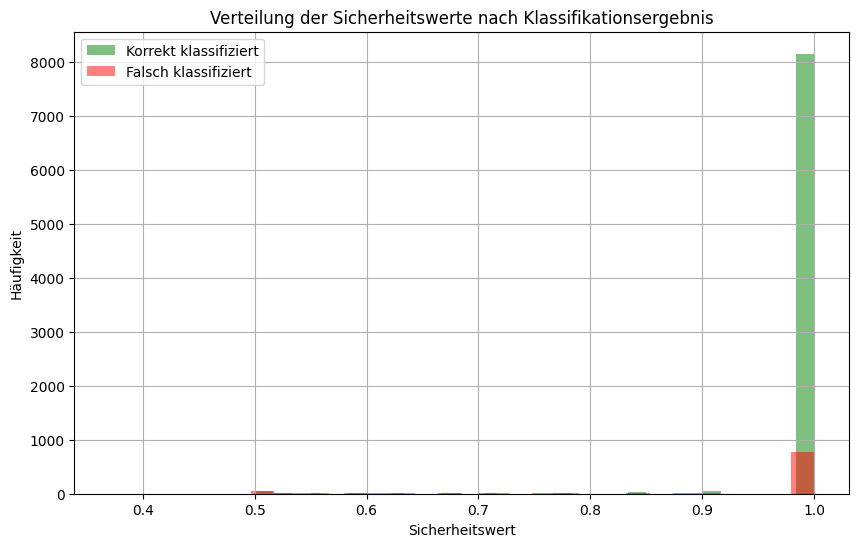

Durchschnittliche Sicherheit bei korrekter Klassifikation: 0.990
Durchschnittliche Sicherheit bei falscher Klassifikation: 0.935


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays für die Sicherheitswerte
correct_confidences = []
incorrect_confidences = []

# Analyse der Testdaten
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        continue

    correct_label = int(all_values[0])
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_predictions = []

    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_predictions.extend(predicted_labels)

    if ensemble_predictions:
        most_common = max(set(ensemble_predictions), key=ensemble_predictions.count)
        confidence = ensemble_predictions.count(most_common) / len(ensemble_predictions)

        if most_common == correct_label:
            correct_confidences.append(confidence)
        else:
            incorrect_confidences.append(confidence)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.hist(correct_confidences, bins=30, alpha=0.5, label='Korrekt klassifiziert', color='green')
plt.hist(incorrect_confidences, bins=30, alpha=0.5, label='Falsch klassifiziert', color='red')
plt.xlabel('Sicherheitswert')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Sicherheitswerte nach Klassifikationsergebnis')
plt.legend()
plt.grid(True)
plt.show()

# Statistische Auswertung
print(f'Durchschnittliche Sicherheit bei korrekter Klassifikation: {np.mean(correct_confidences):.3f}')
print(f'Durchschnittliche Sicherheit bei falscher Klassifikation: {np.mean(incorrect_confidences):.3f}')


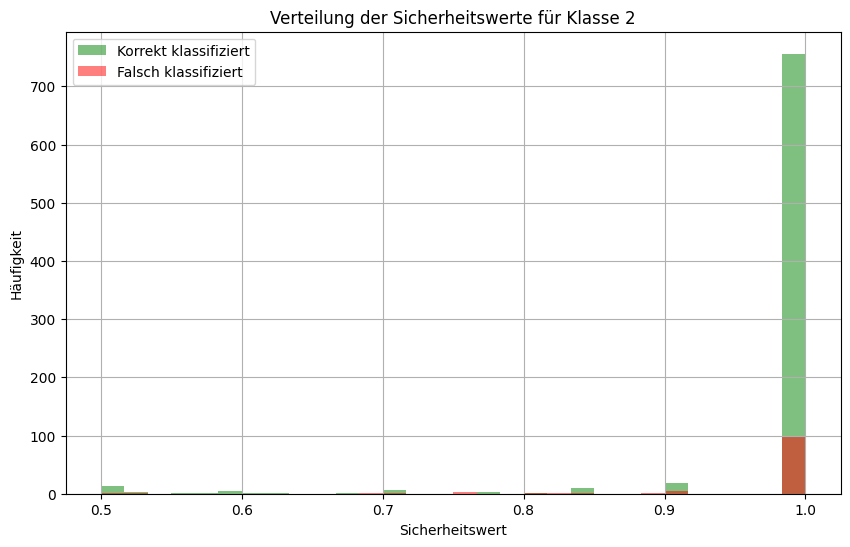

Anzahl korrekt klassifizierter Bilder der Klasse 2: 823
Anzahl falsch klassifizierter Bilder der Klasse 2: 117
Durchschnittliche Sicherheit bei korrekter Klassifikation: 0.977
Durchschnittliche Sicherheit bei falscher Klassifikation: 0.962


In [17]:
# Arrays für die Sicherheitswerte von Klasse 1
class2_correct = []
class2_incorrect = []

# Analyse der Testdaten für Klasse 1
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        continue

    correct_label = int(all_values[0])
    # Nur Bilder der Klasse 1 analysieren
    if correct_label != 2:
        continue

    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_predictions = []

    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_predictions.extend(predicted_labels)

    if ensemble_predictions:
        most_common = max(set(ensemble_predictions), key=ensemble_predictions.count)
        confidence = ensemble_predictions.count(most_common) / len(ensemble_predictions)

        if most_common == correct_label:
            class2_correct.append(confidence)
        else:
            class2_incorrect.append(confidence)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.hist(class2_correct, bins=30, alpha=0.5, label='Korrekt klassifiziert', color='green')
plt.hist(class2_incorrect, bins=30, alpha=0.5, label='Falsch klassifiziert', color='red')
plt.xlabel('Sicherheitswert')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Sicherheitswerte für Klasse 2')
plt.legend()
plt.grid(True)
plt.show()

# Statistische Auswertung
print(f'Anzahl korrekt klassifizierter Bilder der Klasse 2: {len(class2_correct)}')
print(f'Anzahl falsch klassifizierter Bilder der Klasse 2: {len(class2_incorrect)}')
print(f'Durchschnittliche Sicherheit bei korrekter Klassifikation: {np.mean(class2_correct):.3f}')
print(f'Durchschnittliche Sicherheit bei falscher Klassifikation: {np.mean(class2_incorrect):.3f}')


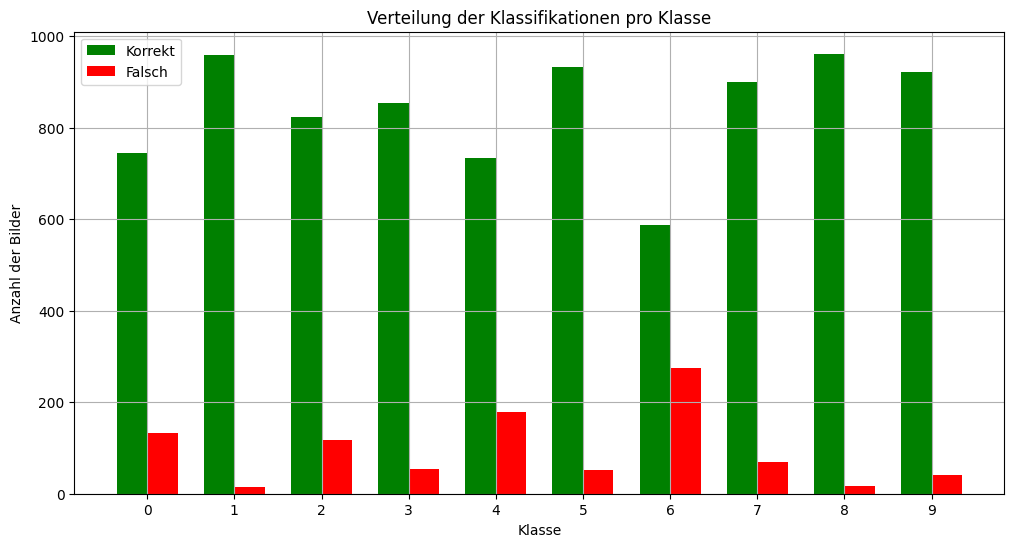

Klassifikationsergebnisse pro Klasse:

Klasse | Korrekt | Falsch | Gesamt
----------------------------------------
     0 |     745 |    132 |    877
     1 |     960 |     15 |    975
     2 |     823 |    117 |    940
     3 |     854 |     54 |    908
     4 |     735 |    178 |    913
     5 |     932 |     52 |    984
     6 |     588 |    274 |    862
     7 |     901 |     70 |    971
     8 |     962 |     17 |    979
     9 |     923 |     42 |    965


In [18]:
# Arrays für die Klassifikationen pro Klasse
class_correct = [0] * 10
class_incorrect = [0] * 10
class_total = [0] * 10

# Analyse der Testdaten
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        continue

    correct_label = int(all_values[0])
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_predictions = []

    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_predictions.extend(predicted_labels)

    if ensemble_predictions:
        most_common = max(set(ensemble_predictions), key=ensemble_predictions.count)

        # Zähle die Klassifikationen
        class_total[correct_label] += 1
        if most_common == correct_label:
            class_correct[correct_label] += 1
        else:
            class_incorrect[correct_label] += 1

# Visualisierung
plt.figure(figsize=(12, 6))
x = numpy.arange(10)
width = 0.35

plt.bar(x - width/2, class_correct, width, label='Korrekt', color='green')
plt.bar(x + width/2, class_incorrect, width, label='Falsch', color='red')

plt.xlabel('Klasse')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Klassifikationen pro Klasse')
plt.legend()
plt.xticks(x)
plt.grid(True)
plt.show()

# Statistische Auswertung
print("Klassifikationsergebnisse pro Klasse:")
print("\nKlasse | Korrekt | Falsch | Gesamt")
print("-" * 40)
for i in range(10):
    print(f"{i:6d} | {class_correct[i]:7d} | {class_incorrect[i]:6d} | {class_total[i]:6d}")


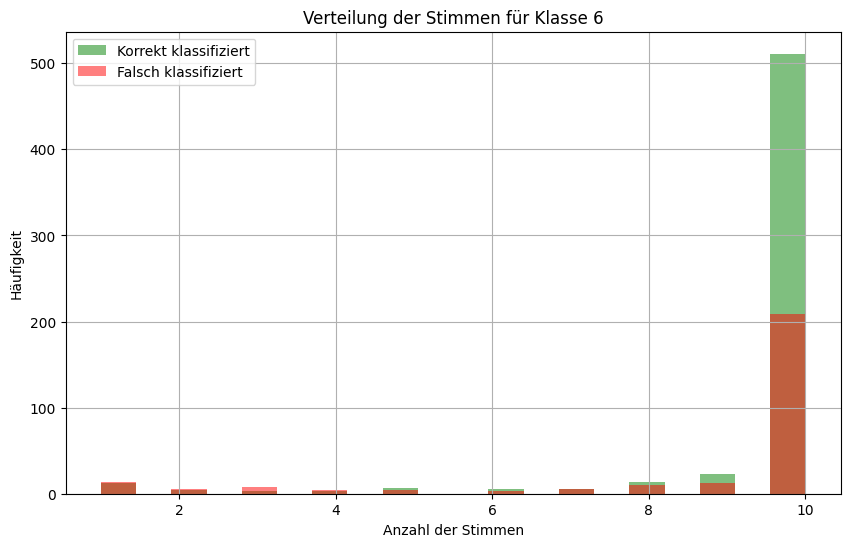

Durchschnittliche Stimmen bei korrekter Klassifikation: 9.5
Durchschnittliche Stimmen bei falscher Klassifikation: 8.8


In [20]:
# Arrays für die Stimmen von Klasse 6
class6_correct_votes = []
class6_incorrect_votes = []

# Analyse der Testdaten für Klasse 6
for record in test_data_list:
    all_values = record.split(',')
    if len(all_values) != 785:
        continue
        
    correct_label = int(all_values[0])
    # Nur Bilder der Klasse 6 analysieren
    if correct_label != 6:
        continue
        
    inputs = (numpy.asarray(all_values[1:], dtype=float) / 255.0 * 0.99) + 0.01
    ensemble_predictions = []
    
    for ensemble in ensembles:
        outputs = [model.query(inputs) for model in ensemble]
        predicted_labels = [i for i, output in enumerate(outputs) if output[0] > 0.5]
        ensemble_predictions.extend(predicted_labels)
    
    if ensemble_predictions:
        most_common = max(set(ensemble_predictions), key=ensemble_predictions.count)
        votes = ensemble_predictions.count(most_common)
        
        if most_common == correct_label:
            class6_correct_votes.append(votes)
        else:
            class6_incorrect_votes.append(votes)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.hist(class6_correct_votes, bins=20, alpha=0.5, label='Korrekt klassifiziert', color='green')
plt.hist(class6_incorrect_votes, bins=20, alpha=0.5, label='Falsch klassifiziert', color='red')
plt.xlabel('Anzahl der Stimmen')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Stimmen für Klasse 6')
plt.legend()
plt.grid(True)
plt.show()

# Statistische Auswertung
print(f'Durchschnittliche Stimmen bei korrekter Klassifikation: {np.mean(class6_correct_votes):.1f}')
print(f'Durchschnittliche Stimmen bei falscher Klassifikation: {np.mean(class6_incorrect_votes):.1f}')
